<a href="https://colab.research.google.com/github/carolines03/DS-project/blob/main/DS_3001_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Wrangling/EDA#

If you have clean data, write up the key variables and make some plots and descriptive statistics tables. If you have some but not all of the data, do some work on what you do have and explain how the pieces are going to fit together. If the data aren't available yet, write up what you expect to get and what challenges you expect to face in cleaning and preparing it for analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/voting_VA.csv', low_memory=False)
print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')
df.head()

(3736, 13) 

Unnamed: 0         int64
year               int64
state             object
state_po          object
county_name       object
county_fips        int64
office            object
candidate         object
party             object
candidatevotes     int64
totalvotes         int64
version            int64
mode              object
dtype: object 

Index(['Unnamed: 0', 'year', 'state', 'state_po', 'county_name', 'county_fips',
       'office', 'candidate', 'party', 'candidatevotes', 'totalvotes',
       'version', 'mode'],
      dtype='object') 



,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


##Key Variables##
- year
- county_name / county_fips
- party
- candidate votes
- total votes
- mode

Mode is an important variable because although the only category for it is 'TOTAL' for all years up until 2020, the mode splits into 3 categories during the 2020 election. These categories are 'ELECTION DAY', 'ABSENTEE', and 'PROVISIONAL'. This change is due to COVID. As mentioned in our write up, we plan to combine the votes for the 3 categories into one TOTAL mode for each county and candidate.

We are not considering state and office key variables, as for this data set they never change. The data we are looking at is voting history for US presidential elections in Virginia. Thus, it is a given that all values for state will be VIRGINIA and all values for office will be US PRESIDENT.

Most years, there are 3 categories listed for party, Democrat, Republican, and Other. Only in two instances, in 2000 and 2020, does there appear a fourth category. In 200 this is the Green Party and in 2020 there is the Libretarian Party.

In [ ]:
# Year
print(df['year'].unique(), '\n')
print(df['year'].value_counts(), '\n')
print(df['year'].describe() , '\n')

[2000 2004 2008 2012 2016 2020] 

year
2020    1592
2000     536
2004     402
2008     402
2012     402
2016     402
Name: count, dtype: int64 

count    3736.000000
mean     2012.826552
std         7.589036
min      2000.000000
25%      2004.000000
50%      2016.000000
75%      2020.000000
max      2020.000000
Name: year, dtype: float64 



In [ ]:
# County Name
print(df['county_name'].unique(), '\n')
print(df['county_name'].value_counts(), '\n')
print(df['county_name'].describe() , '\n')

['ACCOMACK' 'ALBEMARLE' 'ALLEGHANY' 'AMELIA' 'AMHERST' 'APPOMATTOX'
 'ARLINGTON' 'AUGUSTA' 'BATH' 'BEDFORD' 'BLAND' 'BOTETOURT' 'BRUNSWICK'
 'BUCHANAN' 'BUCKINGHAM' 'CAMPBELL' 'CAROLINE' 'CARROLL' 'CHARLES CITY'
 'CHARLOTTE' 'CHESTERFIELD' 'CLARKE' 'CRAIG' 'CULPEPER' 'CUMBERLAND'
 'DICKENSON' 'DINWIDDIE' 'ESSEX' 'FAIRFAX' 'FAUQUIER' 'FLOYD' 'FLUVANNA'
 'FRANKLIN' 'FREDERICK' 'GILES' 'GLOUCESTER' 'GOOCHLAND' 'GRAYSON'
 'GREENE' 'GREENSVILLE' 'HALIFAX' 'HANOVER' 'HENRICO' 'HENRY' 'HIGHLAND'
 'ISLE OF WIGHT' 'JAMES CITY' 'KING AND QUEEN' 'KING GEORGE'
 'KING WILLIAM' 'LANCASTER' 'LEE' 'LOUDOUN' 'LOUISA' 'LUNENBURG' 'MADISON'
 'MATHEWS' 'MECKLENBURG' 'MIDDLESEX' 'MONTGOMERY' 'NELSON' 'NEW KENT'
 'NORTHAMPTON' 'NORTHUMBERLAND' 'NOTTOWAY' 'ORANGE' 'PAGE' 'PATRICK'
 'PITTSYLVANIA' 'POWHATAN' 'PRINCE EDWARD' 'PRINCE GEORGE'
 'PRINCE WILLIAM' 'PULASKI' 'RAPPAHANNOCK' 'RICHMOND' 'ROANOKE'
 'ROCKBRIDGE' 'ROCKINGHAM' 'RUSSELL' 'SCOTT' 'SHENANDOAH' 'SMYTH'
 'SOUTHAMPTON' 'SPOTSYLVANIA' 'STAFFORD' '

In [ ]:
# Party
print(df['party'].unique(), '\n')
print(df['party'].value_counts(), '\n')
print(df['party'].describe() , '\n')

['DEMOCRAT' 'REPUBLICAN' 'GREEN' 'OTHER' 'LIBERTARIAN'] 

party
DEMOCRAT       1068
REPUBLICAN     1068
OTHER          1068
LIBERTARIAN     398
GREEN           134
Name: count, dtype: int64 

count         3736
unique           5
top       DEMOCRAT
freq          1068
Name: party, dtype: object 



In [ ]:
# Candidate Votes
print(df['candidatevotes'].unique(), '\n')
print(df['candidatevotes'].value_counts(), '\n')
print(df['candidatevotes'].describe() , '\n')
print("Total Missing: \n",sum(df['candidatevotes'].isnull()))

[5092 6352  220 ... 5093 1466 2825] 

candidatevotes
0        198
1         55
2         35
5         28
3         27
        ... 
5888       1
4473       1
1918       1
20912      1
2825       1
Name: count, Length: 2226, dtype: int64 

count      3736.000000
mean       5878.282120
std       18452.435802
min           0.000000
25%          59.000000
50%         899.000000
75%        4548.250000
max      355133.000000
Name: candidatevotes, dtype: float64 

Total Missing: 
 0


In [ ]:
# Total Votes
print(df['totalvotes'].unique(), '\n')
print(df['totalvotes'].value_counts(), '\n')
print(df['totalvotes'].describe() , '\n')
print("Total Missing: \n",sum(df['totalvotes'].isnull()))

[ 11925  36846   5123   4788  11712   5927  83559  25271   2210  26149
   2688  13840   5997   9856   5454  20327   8351  11001   3066   4994
 110951   5284   2493  12244   3507   7226   9136   3831 413775  23481
   5739   8706  18829  22392   6820  13699   8777   6852   5412   3906
  14072  41585 114252  21463   1437  12950  24492   2859   5852   5769
   5455   8748  75653  10096   4591   5027   4609  11654   4689  27160
   6145   6114   4892   5605   5492  10483   7996   7385  24255   9711
   6363  10900 100511  12697   3513   2949  42817   7827  23994  10792
   9335  14452  11740   6714  35021  34246   3230  16344  11166  20222
   6026  13310  10225  24583  55199   2441   6279   1975  13224  74585
   7782   2214  18307   2080   9556   5593   3191   6681   2213  47887
   9958   6978   2140  23506  12410   2580   5694  57825  61946   1530
  11062   5861  35455   4448  65926  33442  10770   8514  24661 149771
   7102   3725   7886  13356  43726   7195   5397  12695   6655  94650
  2970

In [ ]:
# Mode
print(df['mode'].unique(), '\n')
print(df['mode'].value_counts(), '\n')
print(df['mode'].describe() , '\n')
print("Total Missing: \n",sum(df['mode'].isnull()))

['TOTAL' 'ABSENTEE' 'ELECTION DAY' 'PROVISIONAL'] 

mode
TOTAL           2144
ELECTION DAY     532
PROVISIONAL      532
ABSENTEE         528
Name: count, dtype: int64 

count      3736
unique        4
top       TOTAL
freq       2144
Name: mode, dtype: object 

Total Missing: 
 0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='candidatevotes', ylabel='Density'>

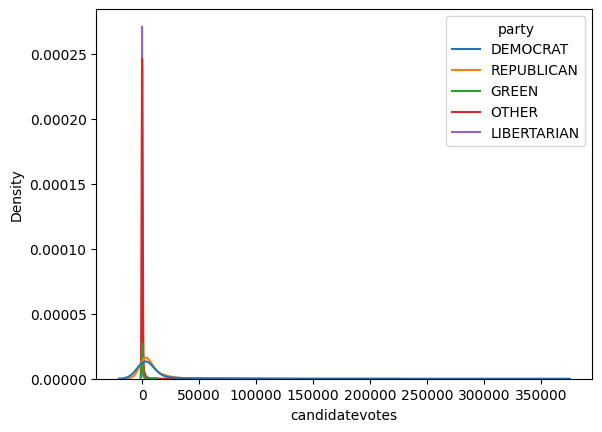

In [21]:
sns.kdeplot(data=df, x='candidatevotes', hue='party')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)`

<Axes: xlabel='candidatevotes_log', ylabel='Density'>

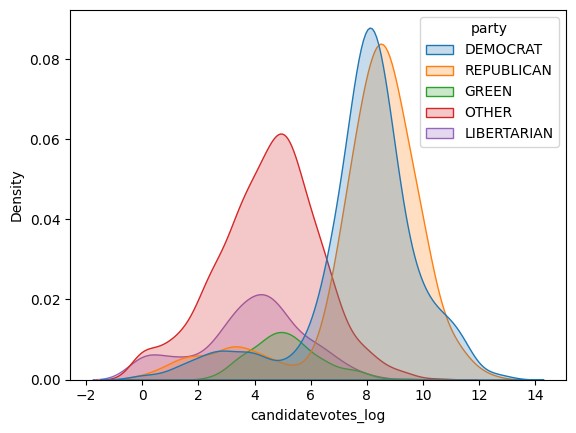

In [24]:
df['candidatevotes_log'] = np.log(df['candidatevotes'])
sns.kdeplot(data=df, x='candidatevotes_log', hue='party', fill=True)

<Axes: xlabel='year', ylabel='totalvotes'>

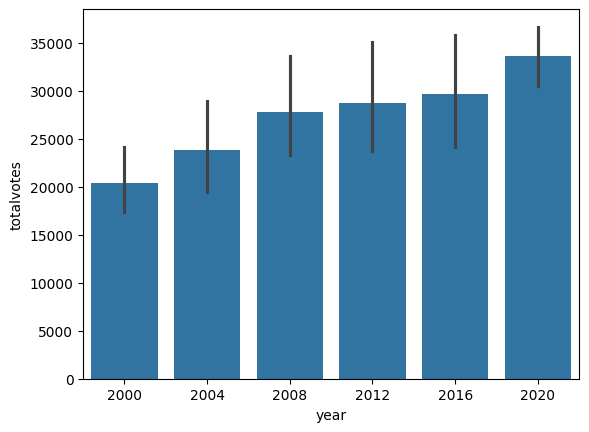

In [25]:
sns.barplot(data=df, x='year', y='totalvotes')